# BOFdat step3

## Finding specie-specific metabolic end goals

In [1]:
from BOFdat import step3
import pandas as pd
import cobra
import os

## Example using the *E.coli* genome-scale model *i*ML1515 and the biomass objective function generate in BOFdat step2

Metabolic end goals may vary considerably from one specie to another. For instance, the peptidoglycan that are present on the surface of *E.coli* may be slightly different in another gram-negative bacteria and completely absent from a gram-positive. This example is obvious for components that define the cell's visible phenotype but what should one do when the metabolites do not completely change the cell's phenotype. The identification of these seemingly invisible specie-specific crucial metabolites is the goal of the Step3 of BOFdat.

Using the metaheuristic genetic algorithm, BOFdat finds the biomass composition that allows to best replicate gene essentiality.

### Steps

1. Generate an initial population

2. Generate optimal biomass compositions

3. Cluster the metabolic end goals

4. Determine stoichiometric coefficients

5. Update


### Generate an initial population

In BOFdat step3, a genetic algorithm is implemented to define the optimal biomass composition. The individuals subjected to the evolution are indexed boolean lists where each position correspond to a defined metabolite. The genetic algorithm requires that an initial population of these individuals be generated. To do so BOFdat first screens the entire model for solvable metabolites and then generates lists of metabolites (inviduals).


## Inputs

### Initial population

    - Population name (string)
    - Experimental essentiality (2 column CSV)
    - Model (JSON or SBML)
    - Path to the BOF of BOFdat Step 2 (CSV)

### Genetic algorithm

    - Model (JSON or SBML)
    - Initial population (CSV)
    - Experimental essentiality, gene identifier and binary essentiality (CSV)
    - Path to the BOF of BOFdat Step 2 (CSV)
    - Hall of Fame name (string)
    - Logbook name (string)

### Spatial clustering

    - Path to output (string)
    - Model (JSON or SBML)
    - Connectivity threshold for removal of metabolites in calculation of distance matrix (int)
    - MCC threshold for selection of individuals (float)
    

In [2]:
#Inputs to generate the initial population
population_name = 'data/Populations/test_pop'
path_to_model = 'data/iML1515.json'
base_biomass_path = 'data/bofdat_step2.csv'
exp_essentiality_path = 'data/glucose_essentiality.csv'

In [3]:
step3.generate_initial_population(population_name,
                                  path_to_model,
                                  base_biomass_path,
                                  exp_essentiality_path,
                                  number_of_populations=5)

Assessing individual metabolite solvability
4


/home/jean-christophe/.local/lib/python2.7/site-packages/BOFdat-0.2.0-py2.7.egg/BOFdat/util/update.py:20 UserWarning: File has 3 columns, assuming index on first column


(<Metabolite 2pg_c at 0x7f3b146d5b10>, True)
(<Metabolite 13dpg_c at 0x7f3b07e41e50>, True)
(<Metabolite prbamp_c at 0x7f3b07e41ed0>, True)
(<Metabolite grdp_c at 0x7f3b14c7b050>, True)
(<Metabolite dms_e at 0x7f3b07e41e90>, False)
(<Metabolite fpram_c at 0x7f3b07e41e10>, True)
(<Metabolite dcyt_p at 0x7f3b157e0bd0>, False)
(<Metabolite fum_p at 0x7f3b146d5cd0>, True)
(<Metabolite tyr__L_p at 0x7f3b146d5b50>, True)
(<Metabolite feenter_e at 0x7f3b07e41fd0>, True)
(<Metabolite gg4abut_c at 0x7f3b5d4c3f10>, True)
(<Metabolite arbtn_e at 0x7f3b146d5dd0>, False)
(<Metabolite aso3_c at 0x7f3b146d5ed0>, False)
(<Metabolite cpgn_un_e at 0x7f3b146d5690>, False)
(<Metabolite alaala_e at 0x7f3b146d5410>, True)
(<Metabolite 3ohexACP_c at 0x7f3b146d5510>, False)
(<Metabolite 3ocddec5eACP_c at 0x7f3b146d5310>, False)
(<Metabolite clpn120_p at 0x7f3b146d5a50>, True)
(<Metabolite apg141_c at 0x7f3b15d6a910>, True)
(<Metabolite dca_c at 0x7f3b15d6a810>, True)
(<Metabolite dkdglcn_c at 0x7f3b15d6a210>,

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sk

[u'athtp_c', u'uaagmda_c', u'uagmda_c', u'thmpp_c', u'btn_c', u'dann_c', u'thmmp_c', u'dtbt_c', u'kdo2lipid4_e', u'cxsam_c', u'malcoame_c', u'um4p_c', u'malcoa_c', u'5mta_c', u'enlipa_e', u'murein5px4p_p', u'murein4px4p_p', u'murein4px4px4p_p', u'murein4px4p4p_p', u'murein5px4px4p_p', u'murein3px4p_p', u'lipa_cold_e', u'lipa_e', u'amet_c', u'sbzcoa_c', u'ugmda_c', u'murein5p5p_p', u'murein5p4p_p', u'murein5p5p5p_p', u'anhgm4p_p', u'murein3px3p_p', u'murein4p4p_p', u'murein3p3p_p', u'murein5p3p_p', u'murein4p3p_p', u'anhgm3p_p', u'murein5px3p_p', u'ametam_c', u'5fthf_c', u'14dhncoa_c', u'ugmd_c', u'4mpetz_c', u'anhgm4p_c', u'ahcys_c', u'anhgm3p_c', u'methf_c', u'5mthf_c', u'hx2coa_c', u'3hhdcoa_c', u'btcoa_c', u'tdcoa_c', u'td2coa_c', u'ppcoa_c', u'3hodcoa_c', u'3hhcoa_c', u'hdcoa_c', u'3ohcoa_c', u'aacoa_c', u'tdecoa_c', u'succoa_c', u'od2coa_c', u'stcoa_c', u'b2coa_c', u'3otdcoa_c', u'3htdcoa_c', u'ddcacoa_c', u'odecoa_c', u'hdd2coa_c', u'3hbcoa_c', u'pmtcoa_c', u'3ohdcoa_c', u'3ohodc

### Generate optimal biomass compositions

Each individual in the population defines a different biomass composition that can be evaluated for fitness. Here, the evaluation function is the gene essentiality prediction. Ideally the constraints applied by the biomass objective function on the model would force flux through certain reactions as it happens *in vivo*. Namely, metabolites that the cell need to produce in order to double should be represented in the biomass objective function. The *in silico* knock-out of genes would cut the flux through the reaction and the cell would not be able to grow, replicating *in vivo* gene essentiality.

Single-gene knock-out is executed for each biomass composition generated. Both *in vivo* and *in vitro* essentiality are converted in boolean vectors of essential and non-essential genes. The distance between the two vectors can then be determined using standard distance metrics (Hamming) or the Matthews Correlation Coefficient (MCC). The metric is used as a measure of fitness. The MCC is then maximized throughout the evolution, selecting biomass compositions that yield the highest. The standard genetic operators mutation and cross-over are operated on the inviduals to create genetic diversity.

In [3]:
#Files for the genetic algorithm
path_to_model = 'data/iML1515.json'
initial_population_path = 'data/Populations/test_pop_1.csv'
exp_essentiality_path = 'data/glucose_essentiality.csv'
base_biomass = 'data/bofdat_step2.csv'
logbook_name = 'data/Outputs/logbook_test_pop_1.csv'
hall_of_fame_name = 'data/Outputs/hof_test_pop_1.csv'

In [ ]:
step3.find_metabolites(path_to_model,
                       initial_population_path,
                       exp_essentiality_path,
                       base_biomass=True,logbook=True,history=False,processes=None,
                       logbook_name=logbook_name,hall_of_fame_name=hall_of_fame_name)

Using default GA parameters
initializing toolbox
{'fitness_size': -0.25, 'indpb': 0.005, 'MUTPB': 0.1, 'distance_measure': 'mcc', 'NGEN': 20, 'CXPB': 0.5, 'fitness_distance': 1.0}
made it to the GA
{'hall_of_fame_size': 1000, 'logbook_name': 'data/Outputs/logbook_test_pop_1.csv', 'hall_of_fame_name': 'data/Outputs/hof_test_pop_1.csv'}
I will evaluate the initial population
8
Fitnesses that will be attributed to individuals [(0.5831338574121917, 20), (0.6059394725741493, 20), (0.6393695697555211, 20), (0.6674475878654471, 20), (0.6769364729767546, 20), (0.5954531704191854, 20), (0.6663692082440766, 20), (0.6029438370809624, 20), (0.6119153310764769, 20), (0.6173702451382262, 20), (0.6624072660575369, 20), (0.7021886829961169, 20), (0.6262830123495685, 20), (0.6637836843155994, 20), (0.7072431657430097, 20), (0.6236043104240845, 20), (0.6537646020336324, 20), (0.6386318032265479, 20), (0.6311775953880013, 20), (0.6313771731445313, 20), (0.62898418389611, 20), (0.6962006490528011, 20), (0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/usr/lib/python2.7/inspect.py", line 497, in getmodule
    f = getabsfile(module)
  File

IndexError: string index out of range

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 637, in _abort_queues
    self._abort_queue(stream)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 662, in _abort_queue
    poll

### Cluster the metabolic end goals

The output of a genetic algorithm may vary from one initial population to another. To get a sense of what would be an optimal result, it is generally advised to run more than one evolution and aggregate the results. BOFdat does so by clustering the metabolites that appeared most frequently in the optimal result of every evolution. The distance matrix for every metabolite in the network is generated and reduced to the most frequent metabolites. Hierarchical clustering is then applied to the reduced distance matrix in order to generate clusters of metabolic end goals that can be used for curation.

In [2]:
#Necessary inputs
data_path = '/home/jean-christophe/Documents/Maitrise_UCSD/BOFdat_qual/Paper_figures/data/Outputs_10-07/'
outpath = '/home/jean-christophe/Documents/Maitrise_UCSD/BOFdat_qual/Paper_figures/'
path_to_model = 'data/iML1515.json'
eps = 6
CONNECTIVITY_THRESHOLD = 15
BASELINE=0.2
show_frequency = True
show_matrix = True

{'frequency_fig_name': '/home/jean-christophe/Documents/Maitrise_UCSD/BOFdat_qual/Paper_figures/frequency_fig.svg', 'matrix_fig_name': '/home/jean-christophe/Documents/Maitrise_UCSD/BOFdat_qual/Paper_figures/matrix_fig.svg'}


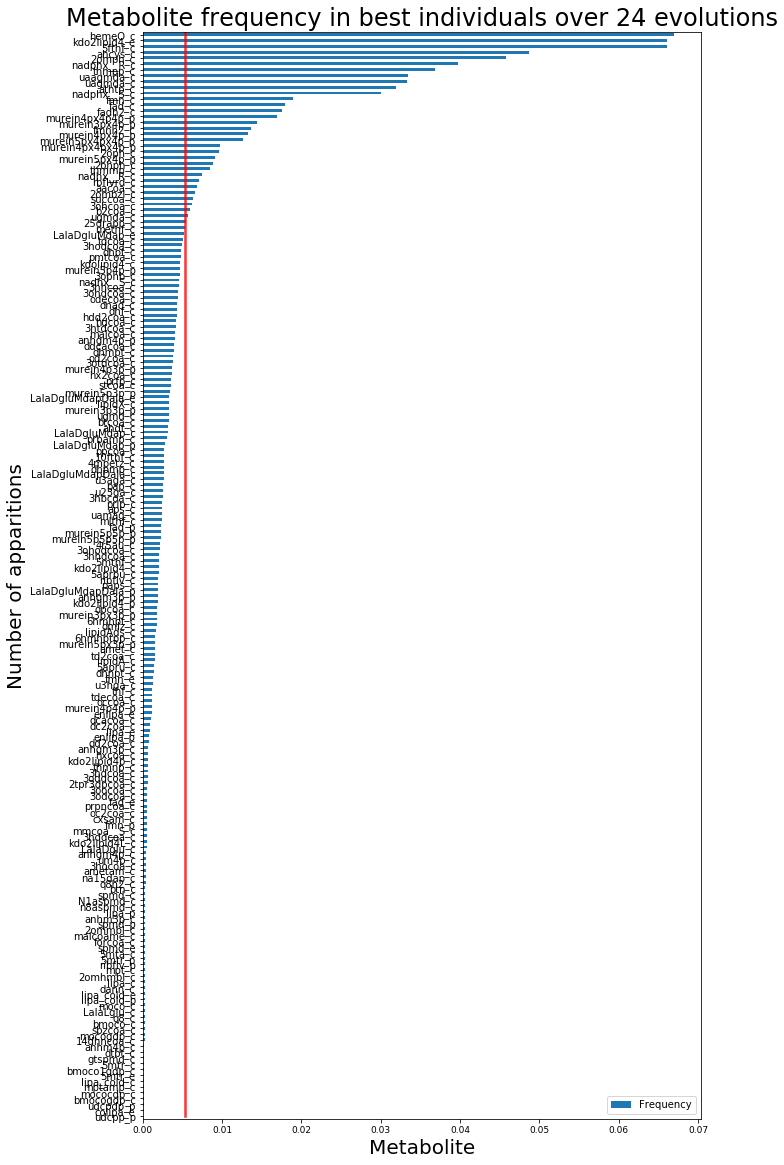

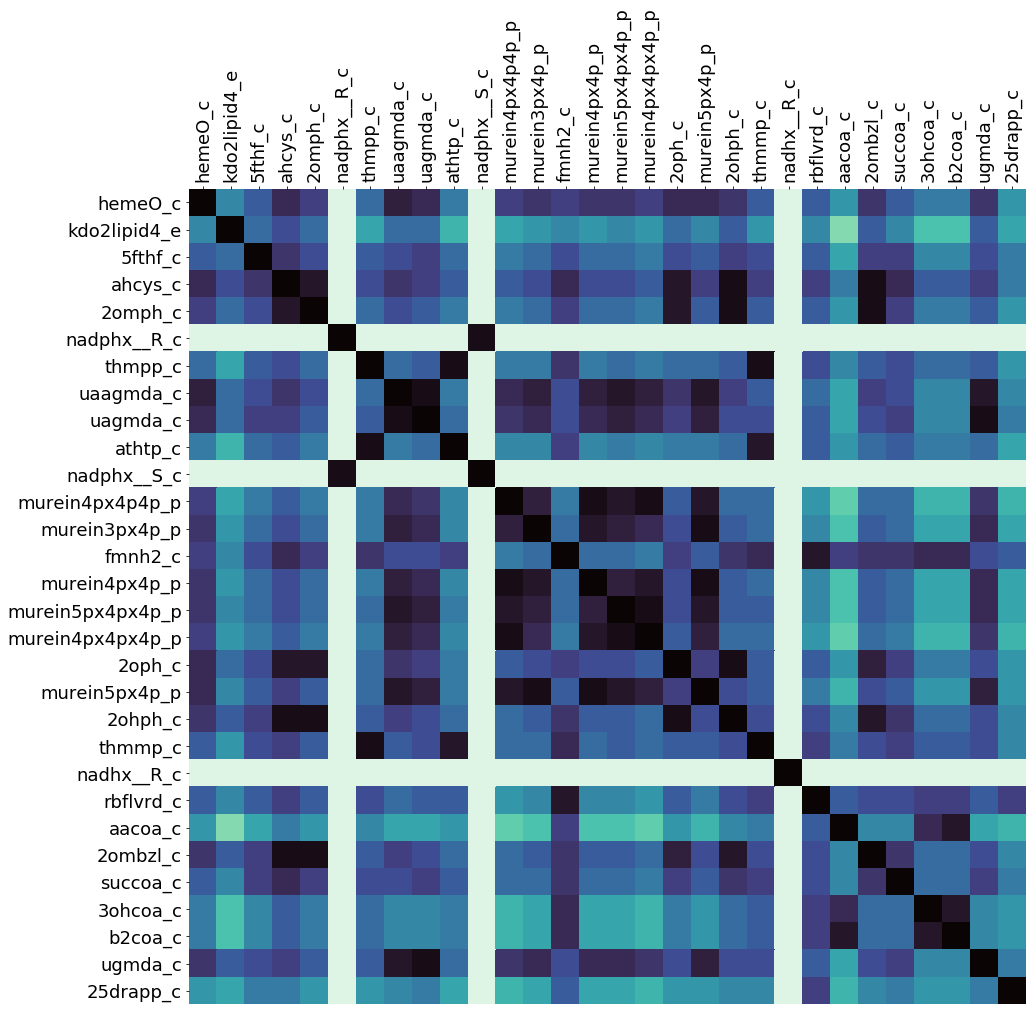

In [3]:
#Run the clustering
selected_metabolites = step3.cluster_metabolites(data_path,
                              path_to_model,
                              CONNECTIVITY_THRESHOLD,
                              BASELINE,
                              show_frequency,
                              show_matrix,
                              frequency_fig_name=os.path.join(outpath,'frequency_fig.svg'),
                              matrix_fig_name=os.path.join(outpath,'matrix_fig.svg'))

### Determine stoichiometric coefficients

In [5]:
from BOFdat.util.update import determine_coefficients
WEIGHT_FRACTION = 0.05
model = cobra.io.load_json_model(path_to_model)
bd_step3 = determine_coefficients(selected_metabolites,model,WEIGHT_FRACTION)

### Update

In [6]:
#Get the input from the previous step
from BOFdat.util import update
path_to_biomass = 'data/bofdat_step2.csv'
bd_step2 = update.convert_to_dictionary(path_to_biomass)
bd_step3.update(bd_step2)
update.save_biomass(bd_step3,'data/bofdat_step3.csv')

/home/jean-christophe/Documents/Maitrise_UCSD/BOFdat/BOFdat/util/update.py:22 UserWarning: File has 3 columns, assuming index on first column


76